# Video Game Sales Data

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of <a>vgchartz.com</a>.

Fields include

1. Rank - Ranking of overall sales
2. Name - The games name
3. Platform - Platform of the games release (i.e. PC,PS4, etc.)
4. Year - Year of the game's release
5. Genre - Genre of the game
6. Publisher - Publisher of the game
7. NA_Sales - Sales in North America (in millions)
8. EU_Sales - Sales in Europe (in millions)
9. JP_Sales - Sales in Japan (in millions)
10. Other_Sales - Sales in the rest of the world (in millions)
11. Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape. It is based on BeautifulSoup using Python. There are 16,598 records. 2 records were dropped due to incomplete information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("vgsales.csv")

In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df = df.dropna()

In [7]:
df['Year'] = df['Year'].astype(int)

In [8]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# EDA

## 1. Number of Games released every year

In [9]:
years = df['Year'].unique()

In [10]:
#All years in ascending order
years.sort()

In [11]:
# Game counts for each year. Year in ascending order
gamecounts = df.groupby('Year').count()['Rank']

In [12]:
yearwise_gamecount = pd.DataFrame(columns=['Year','GamesThatYear'])

In [13]:
yearwise_gamecount['Year'] = years
yearwise_gamecount['GamesThatYear'] = gamecounts.values

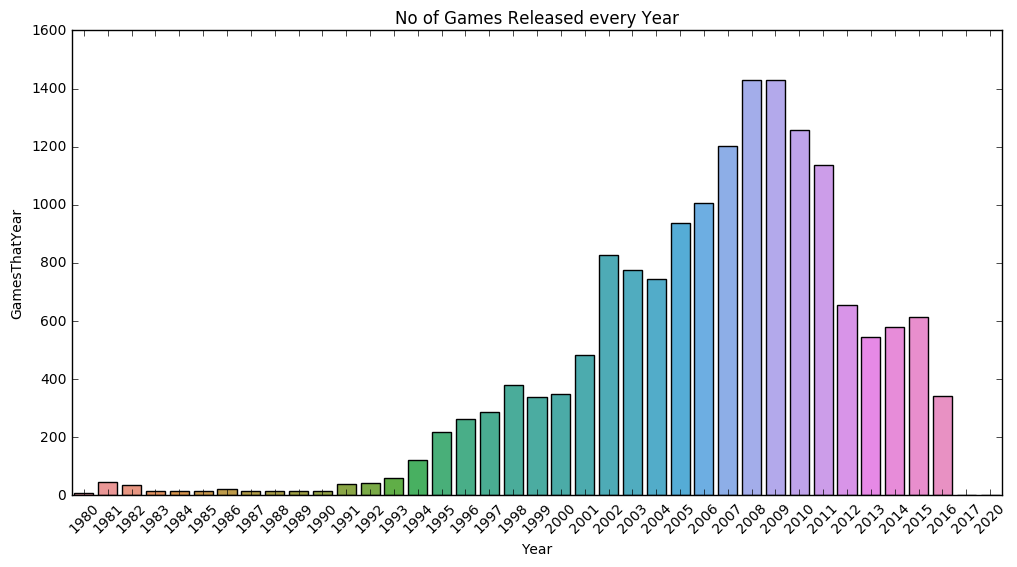

In [25]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Year',y='GamesThatYear',data=yearwise_gamecount)
ax.set_xticklabels(years,rotation=45)
plt.title("No of Games Released every Year")

## 2. Year-wise global sales of video games

In [27]:
yearwise_globalsales = pd.DataFrame(columns=['Year','GlobalSalesThatYear'])

In [30]:
# Global sales for each year. Year in ascending order
globalsales = df.groupby('Year').sum()['Global_Sales']

In [32]:
yearwise_globalsales['Year'] = years
yearwise_globalsales['GlobalSalesThatYear'] = globalsales.values

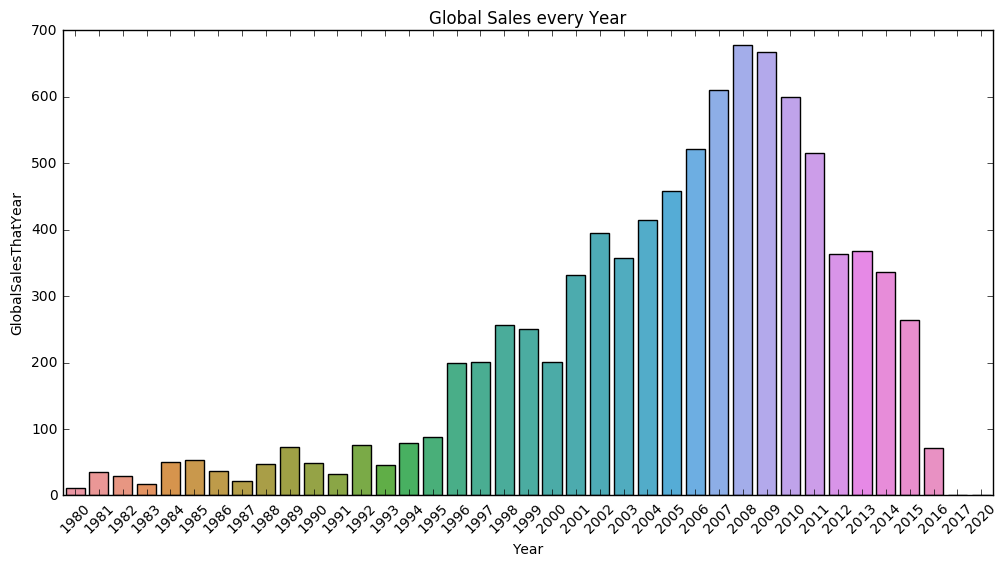

In [33]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Year',y='GlobalSalesThatYear',data=yearwise_globalsales)
ax.set_xticklabels(years,rotation=45)
plt.title("Global Sales every Year")

## 3. Top 10 Game publishers

In [40]:
publisher_wise_gamecount = df.groupby('Publisher').count()

In [50]:
m = publisher_wise_gamecount['Rank'].mean()

In [56]:
publisher_wise_gamecount = publisher_wise_gamecount[publisher_wise_gamecount['Rank'] >= m ].reset_index()[['Publisher','Rank']]

In [58]:
publisher_wise_gamecount.columns = ['Publisher','GamesByPublisher']

In [62]:
publisher_wise_gamecount.sort_values('GamesByPublisher',ascending=False).head(10)

,Publisher,GamesByPublisher
22,Electronic Arts,1339
4,Activision,966
43,Namco Bandai Games,928
61,Ubisoft,918
35,Konami Digital Entertainment,823
57,THQ,712
44,Nintendo,696
51,Sony Computer Entertainment,682
50,Sega,632
59,Take-Two Interactive,412


These are our top 10 publishers in terms of number of games published !

## 4. Platform-wise Analysis

In [64]:
platform_wise_gamecount = df.groupby('Platform').count().reset_index()

In [68]:
platform_wise_gamecount = platform_wise_gamecount.sort_values(by='Rank',ascending=False).head(5)[['Platform','Rank']]

In [70]:
platform_wise_gamecount.columns = ['Platform','GamesOnThatPlatform']

In [71]:
platform_wise_gamecount

,Platform,GamesOnThatPlatform
4,DS,2131
16,PS2,2127
17,PS3,1304
26,Wii,1290
28,X360,1234


These are our **top 5** platforms in terms of number of games available

In [128]:
df1 = df.groupby(['Year','Platform']).count().reset_index()

In [155]:
ds = df1[df1['Platform'] == 'DS'][['Year','Rank']]
ps2 = df1[df1['Platform'] == 'PS2'][['Year','Rank']]
ps3 = df1[df1['Platform'] == 'PS3'][['Year','Rank']]
wii = df1[df1['Platform'] == 'Wii'][['Year','Rank']]
x360 = df1[df1['Platform'] == 'X360'][['Year','Rank']]

In [156]:
ds.columns = [['Year','DS']]
ps2.columns = [['Year','PS2']]
ps3.columns = [['Year','PS3']]
wii.columns = [['Year','Wii']]
x360.columns = [['Year','X360']]

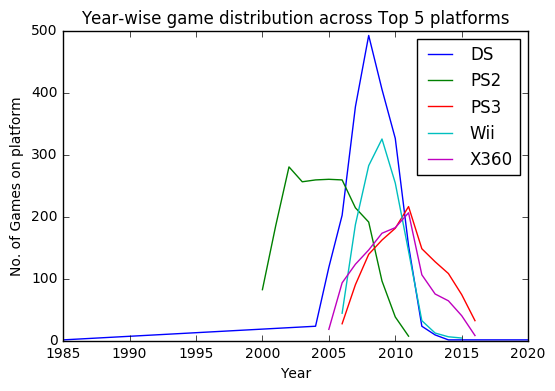

In [178]:
plt.plot(ds['Year'],ds['DS'])
plt.plot(ps2['Year'],ps2['PS2'])
plt.plot(ps3['Year'],ps3['PS3'])
plt.plot(wii['Year'],wii['Wii'])
plt.plot(x360['Year'],x360['X360'])
plt.legend()
plt.xlabel("Year")
plt.ylabel("No. of Games on platform")
plt.title("Year-wise game distribution across Top 5 platforms")

## 5. Genre-wise Analysis

In [187]:
genre_wise_sales = df.groupby('Genre').sum().reset_index()[['Genre','Global_Sales']].sort_values('Global_Sales')

In [188]:
genre_wise_sales

,Genre,Global_Sales
11,Strategy,173.27
1,Adventure,234.59
5,Puzzle,242.21
9,Simulation,389.98
2,Fighting,444.05
6,Racing,726.76
3,Misc,789.87
4,Platform,829.13
7,Role-Playing,923.83
8,Shooter,1026.20


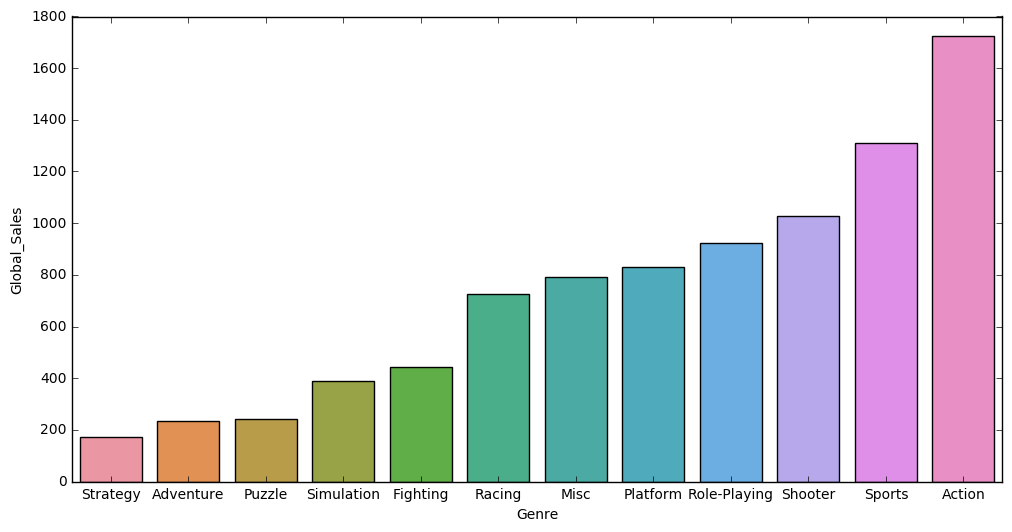

In [191]:
plt.figure(figsize=(12,6))
sns.barplot(x='Genre',y='Global_Sales',data=genre_wise_sales)

In [194]:
sales_by_genre = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']

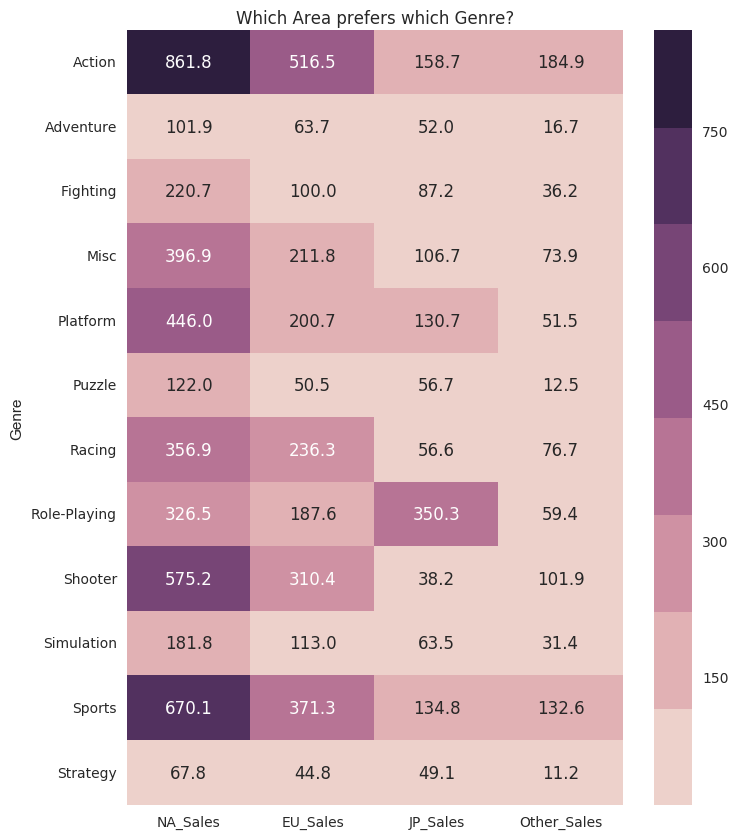

In [206]:
plt.figure(figsize=(8, 10))
sns.set(font_scale=1.0)
sns.heatmap(sales_by_genre.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f',cmap=sns.cubehelix_palette(8))
plt.title("Which Area prefers which Genre?")

**Inferences**  
1. Most **Action** games were sold in North America followed by Europe  
2. Most **Sports** games were sold in North America followed by Europe

## 6. Publisher-wise Analysis

Let's find the top 5 publishers as per Global sales.

In [218]:
publisher_wise_sales = df.groupby('Publisher').sum().reset_index()[['Publisher','Global_Sales']].sort_values('Global_Sales',ascending=False).head(5)

In [219]:
publisher_wise_sales

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54


Here are our **Top 5** publishers as per **Global Sales**

Let's get Genre-wise sales for each of these Top 5 publishers

In [248]:
df1 = df.groupby(['Publisher','Genre']).sum().reset_index()[['Publisher','Genre','Global_Sales']]

In [258]:
nintendo_genrewise_sales = df1[df1['Publisher'] == 'Nintendo'][['Genre','Global_Sales']]
ea_genrewise_sales = df1[df1['Publisher'] == 'Electronic Arts'][['Genre','Global_Sales']]
activision_genrewise_sales = df1[df1['Publisher'] == 'Activision'][['Genre','Global_Sales']]
sony_genrewise_sales = df1[df1['Publisher'] == 'Sony Computer Entertainment'][['Genre','Global_Sales']]
ubisoft_genrewise_sales = df1[df1['Publisher'] == 'Ubisoft'][['Genre','Global_Sales']]

In [350]:
all_genres = df['Genre'].unique()

In [351]:
all_genres.sort()

In [352]:
all_genres = all_genres.tolist()

In [353]:
new_df = pd.DataFrame(columns=all_genres,index=publisher_wise_sales['Publisher'])

In [354]:
new_df.loc['Nintendo'][:] = nintendo_genrewise_sales.T.loc['Global_Sales']

In [355]:
new_df.loc['Electronic Arts'][:] = ea_genrewise_sales.T.loc['Global_Sales']

In [357]:
new_df.loc['Activision'][:] = activision_genrewise_sales.T.loc['Global_Sales']

In [358]:
new_df.loc['Sony Computer Entertainment'][:] = sony_genrewise_sales.T.loc['Global_Sales']

In [359]:
new_df.loc['Ubisoft'][:] = ubisoft_genrewise_sales.T.loc['Global_Sales']

In [362]:
new_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
Nintendo,128.1,35.71,53.35,180.67,426.18,124.88,151.3,284.57,69.69,85.25,218.01,26.72
Electronic Arts,115.34,4.75,30.85,19.74,6.53,4.55,145.77,35.3,158.26,89.53,468.69,14.08
Activision,141.82,5.42,2.86,76.55,33.4,1.06,16.99,46.79,295.4,8.26,75.16,17.7
Sony Computer Entertainment,94.52,13.55,28.15,80.8,104.06,3.71,110.57,44,57.52,8.67,59.39,2.34
Ubisoft,142.94,22.19,6.9,97.53,21.06,6.33,15.83,16.76,67.65,44.48,23.42,8.45


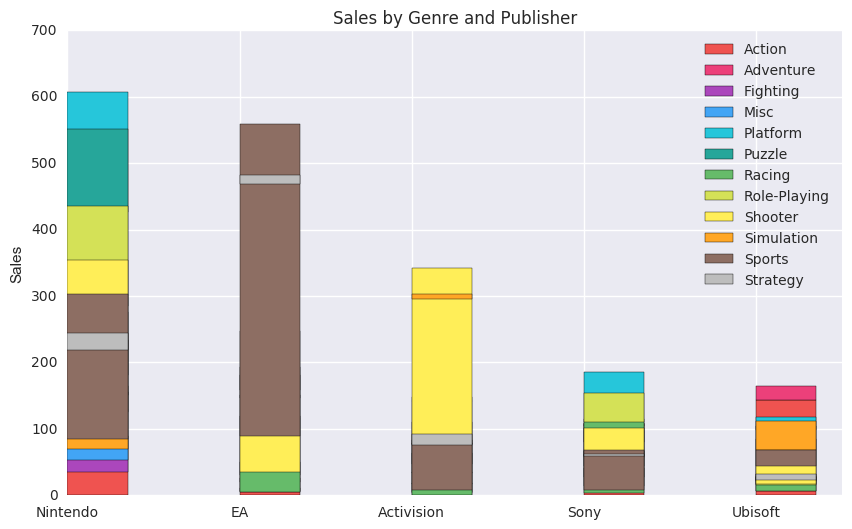

In [375]:
N = 5
plt.figure(figsize=(10,6))
actionSales = new_df['Action'].values
adventureSales = new_df['Adventure'].values
fightingSales = new_df['Fighting'].values
miscSales = new_df['Misc'].values
platformSales = new_df['Platform'].values
puzzleSales = new_df['Puzzle'].values
racingSales = new_df['Racing'].values
roleplayingSales = new_df['Role-Playing'].values
shooterSales = new_df['Shooter'].values
simulationSales = new_df['Simulation'].values
sportsSales = new_df['Sports'].values
strategySales = new_df['Strategy'].values
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, actionSales, width,color='#EF5350')
p2 = plt.bar(ind, adventureSales, width,bottom=actionSales,color='#EC407A')
p3 = plt.bar(ind, fightingSales, width,bottom=adventureSales,color='#AB47BC')
p4 = plt.bar(ind, miscSales, width,bottom=fightingSales,color='#42A5F5')
p5 = plt.bar(ind, platformSales, width,bottom=miscSales,color='#26C6DA')
p6 = plt.bar(ind, puzzleSales, width,bottom=platformSales,color='#26A69A')
p7 = plt.bar(ind, racingSales, width,bottom=puzzleSales,color='#66BB6A')
p8 = plt.bar(ind, roleplayingSales, width,bottom=racingSales,color='#D4E157')
p9 = plt.bar(ind, shooterSales, width,bottom=roleplayingSales,color='#FFEE58')
p10 = plt.bar(ind, simulationSales, width,bottom=shooterSales,color="#FFA726")
p11 = plt.bar(ind, sportsSales, width,bottom=simulationSales,color="#8D6E63")
p12 = plt.bar(ind, strategySales, width,bottom=sportsSales,color="#BDBDBD")

plt.ylabel('Sales')
plt.title('Sales by Genre and Publisher')
plt.xticks(ind, ('Nintendo', 'EA', 'Activision', 'Sony', 'Ubisoft'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0],p9[0],p10[0],p11[0],p12[0]), 
           ('Action', 'Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy'))

plt.show()